Производственная функция Кобба-Дугласа: Y = 304.58 * K^0.73 * L^0.40


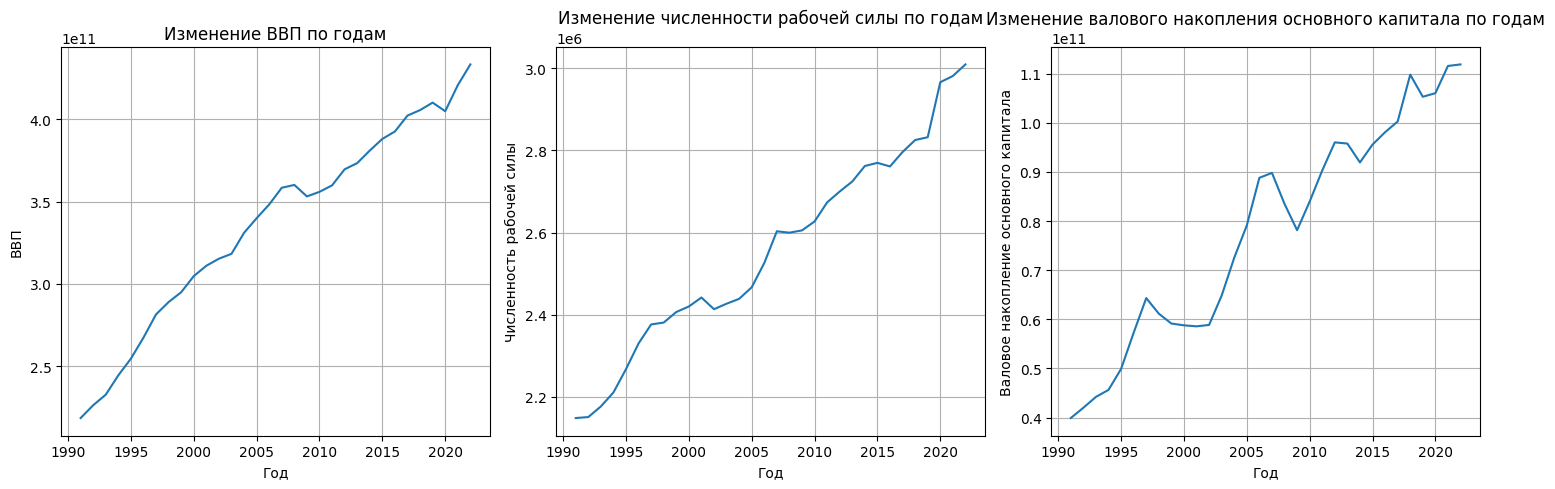

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = pd.read_excel('date.xlsx', sheet_name='DATA')

if 'Year' not in data.columns:
    print("Ошибка: Столбец 'Year' не найден в данных.")
else:
    Y = np.log(data['GDP'])
    L = np.log(data['Labor'])
    K = np.log(data['Capital'])
    X = np.column_stack((np.ones(len(Y)), L, K))

    model = LinearRegression()
    model.fit(X, Y)
    alpha = model.coef_[1]
    beta = model.coef_[2]
    A = np.exp(model.intercept_)
    print(f"Производственная функция Кобба-Дугласа: Y = {A:.2f} * K^{alpha:.2f} * L^{beta:.2f}")

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(data['Year'], data['GDP'])
    plt.xlabel('Год')
    plt.ylabel('ВВП')
    plt.title('Изменение ВВП по годам')
    plt.grid(True)

    plt.subplot(1, 3, 2)
    plt.plot(data['Year'], data['Labor'])
    plt.xlabel('Год')
    plt.ylabel('Численность рабочей силы')
    plt.title('Изменение численности рабочей силы по годам')
    plt.grid(True)

    plt.subplot(1, 3, 3)
    plt.plot(data['Year'], data['Capital'])
    plt.xlabel('Год')
    plt.ylabel('Валовое накопление основного капитала')
    plt.title('Изменение валового накопления основного капитала по годам')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
avg_labor_productivity = np.mean(data['GDP'] / data['Labor'])
avg_capital_productivity = np.mean(data['GDP'] / data['Capital'])

def marginal_productivity_labor(K, L):
    return A * alpha * (K**alpha) * (L**(beta -1))

def marginal_productivity_capital(K, L):
    return A * beta * (K**(alpha - 1)) * (L**beta)

mean_K = np.mean(data['Capital'])
mean_L = np.mean(data['Labor'])

mpl = marginal_productivity_labor(mean_K, mean_L)
mpc = marginal_productivity_capital(mean_K, mean_L)

elasticity_labor = alpha
elasticity_capital = beta

mrs_lk = mpl / mpc

sigma = 1

print(f"Средняя производительность труда: {avg_labor_productivity:.2f}")
print(f"Средняя производительность капитала: {avg_capital_productivity:.2f}")
print(f"Предельная производительность труда (по средним): {mpl:.2f}")
print(f"Предельная производительность капитала (по средним): {mpc:.2f}")
print(f"Эластичность выпуска по труду: {elasticity_labor:.2f}")
print(f"Эластичность выпуска по капиталу: {elasticity_capital:.2f}")
print(f"Предельная норма замещения труда капиталом (по средним): {mrs_lk:.2f}")
print(f"Эластичность замещения: {sigma:.2f}")

Средняя производительность труда: 129372.54
Средняя производительность капитала: 4.49
Предельная производительность труда (по средним): 2744382.30
Предельная производительность капитала (по средним): 50.23
Эластичность выпуска по труду: 0.73
Эластичность выпуска по капиталу: 0.40
Предельная норма замещения труда капиталом (по средним): 54632.97
Эластичность замещения: 1.00


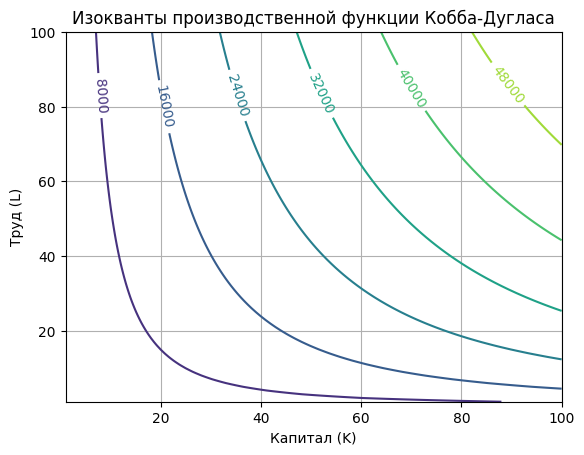

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def cobb_douglas(K, L, A, alpha, beta):
    return A * (K**alpha) * (L**beta)

A = 304.58
alpha = 0.73
beta = 0.40

K_range = np.linspace(1, 100, 100)
L_range = np.linspace(1, 100, 100)
K, L = np.meshgrid(K_range, L_range)

cs = plt.contour(K, L, cobb_douglas(K, L, A, alpha, beta),)
plt.clabel(cs, inline=1, fontsize=10)

plt.xlabel('Капитал (K)')
plt.ylabel('Труд (L)')
plt.title('Изокванты производственной функции Кобба-Дугласа')
plt.grid(True)
plt.show()